# Exploratory Data Analysis I

## Library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Load Data

Here is the raw data that will be used in the machine learning process.

In [2]:
df = pd.read_csv('datasets/aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


It can be seen in the info about the aug_train.csv data, almost all of the data has an object type. Columns that have data types other than object are enrollee_id and training_hours which are integer type. In addition, there is a float data type which is shared by the city_development_index and target columns.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Missing Value

As for the missing value, it can be seen in the table below, some columns have a lot of missing value. However, there are 5 columns that do not have a missing value.

The columns that have missing values are:
* gender 
* enrolled_university 
* major_discipline 
* experience 
* company_size
* company_type
* last_new_job 

In [4]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [5]:
columns = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']

missing_val = pd.DataFrame({'Columns':columns})

miss = []
for i in columns:
  miss.append(df.isnull().sum().loc[i])

missing_val['Count'] = miss
missing_val['Percentage'] = missing_val['Count'].apply(lambda x: round((x/len(df) * 100),2))
missing_val_sort = missing_val.sort_values(by='Count', ascending=False)
missing_val_sort

,Columns,Count,Percentage
6,company_type,6140,32.05
5,company_size,5938,30.99
0,gender,4508,23.53
3,major_discipline,2813,14.68
2,education_level,460,2.40
7,last_new_job,423,2.21
1,enrolled_university,386,2.01
4,experience,65,0.34


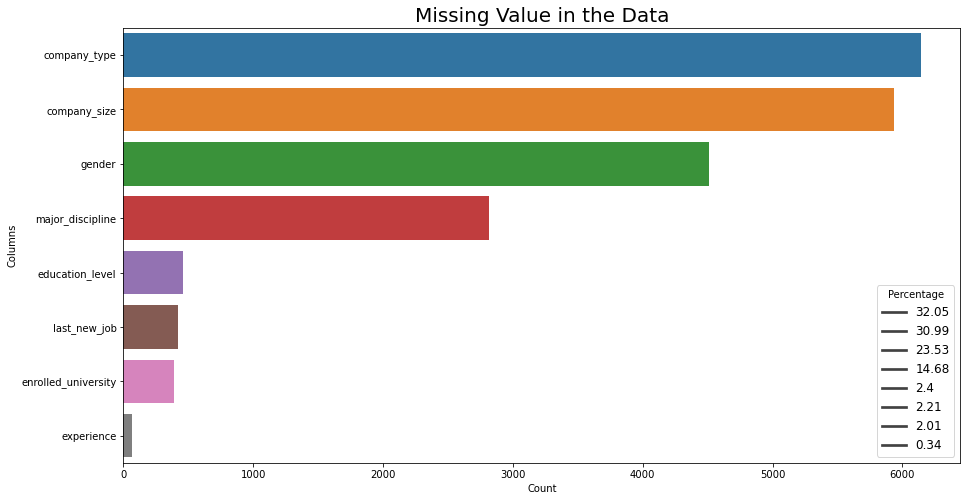

In [6]:
plt.figure(figsize=(15,8))
plots = sns.barplot(x='Count',y='Columns', data=missing_val_sort)
plt.legend(missing_val_sort['Percentage'], title='Percentage', fontsize='large')
plt.title('Missing Value in the Data', size=20)
plt.show()

## City

The city column shows the city where people live. City does not use the city's original name, but in coded form, so the entry in the data is 'city_(number)'. The number consists of 1 to 180. Even though the largest number is 180, the unique value in the City column only has 123 values. This number of unique values can be interpreted that the data has a high cardinality.

In [7]:
print('Total unique value in city column: ', df['city'].nunique())

Total unique value in city column:  123


In [8]:
city_count_top_10 = df.groupby('city')['enrollee_id'].count().sort_values(ascending=False).reset_index().head(10)
city_count_top_10

,city,enrollee_id
0,city_103,4355
1,city_21,2702
2,city_16,1533
3,city_114,1336
4,city_160,845
5,city_136,586
6,city_67,431
7,city_75,305
8,city_102,304
9,city_104,301


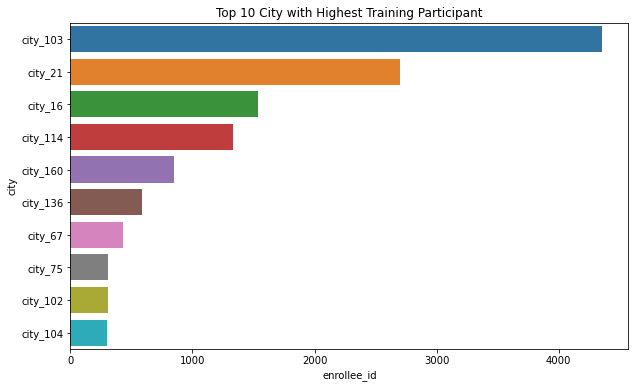

In [9]:
plt.figure(figsize=(10,6))

sns.barplot(x='enrollee_id', y='city', data=city_count_top_10)
plt.title('Top 10 City with Highest Training Participant')

plt.show()

The graph above is a bar chart of the top 10 cities with the most training participants. The city with the most participants is city with the code 103 with the number of participant 4355.

## City Development Index

Quoted from the Wikipedia page, the City Development Index (CDI) was created by the United Nations at the United Nations Conference on Human Settlements (Habitat II) in 1996 which aims to provide an overview of the development of a city.

One way to calculate CDI can be done with the following formula:

<img src="datasets/calc_cdi.png" alt="calc_cdi" width="500"/>

CDI has categories, namely infrastructure, waste management, health, education and products from the city. The five factors are combined to become the CDI value. Each of these factors is a component of several indicators that have been normalized to obtain a CDI that has a value range of 0 to 1.

In [10]:
print(f"City Development Index has {df['city_development_index'].nunique()} unique values")

City Development Index has 93 unique values


In [11]:
df['city_development_index'].describe()

count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

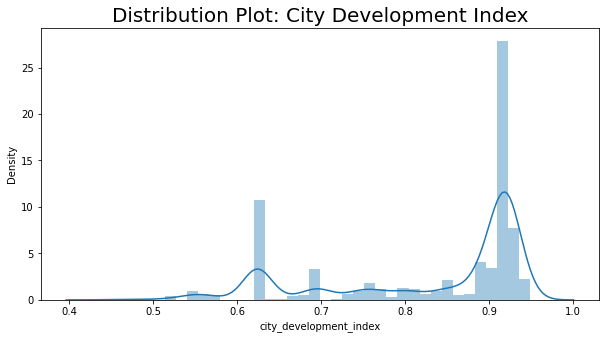

In [12]:
plt.figure(figsize=(10,5))

sns.distplot(df['city_development_index'])
plt.title("Distribution Plot: City Development Index", size=20)

plt.show()

## City & CDI

Let's check the city column and city development index. below is the unique value of the city column. The unique values are 123 entries. Meanwhile, CDI has a unique value of 93 entries. Because the number of unique value cities is more than the unique value CDI, it is possible that there is the same CDI value among the unique value cities.

In [13]:
print(f"City unique values                   : {df['city'].nunique()}")
print(f"City Development Index unique values : {df['city_development_index'].nunique()}")


City unique values                   : 123
City Development Index unique values : 93


Next, we check whether there is a CDI value that has the same value between cities.

At a glance, we can see that each city has its own CDI value because the number of data for unique values in all data and the data checked below is the same as 123.

In [14]:
city_unique = df.groupby('city')['city_development_index'].unique().reset_index()
city_unique

,city,city_development_index
0,city_1,[0.847]
1,city_10,[0.895]
2,city_100,[0.887]
3,city_101,[0.5579999999999999]
4,city_102,[0.804]
...,...,...
118,city_93,[0.865]
119,city_94,[0.698]
120,city_97,[0.925]
121,city_98,[0.949]


Meanwhile, with a unique value of 93, it is possible that the CDI value could be the same between the cities in the data. We can see one example in the table below. There are two cities with the same CDI value, namely, city_28 and city_75.

In [15]:
city_unique.sort_values(by='city_development_index', ascending=False).head()

,city,city_development_index
121,city_98,[0.949]
70,city_28,[0.939]
103,city_75,[0.939]
13,city_114,[0.926]
120,city_97,[0.925]


## Gender

Let's look at the missing value of gender. It can be seen that in the gender column there are 4508 missing values. After that we see the unique value of gender and its number, then we plot.

In [16]:
print(f"'gender' column has {df['gender'].nunique()} unique values {df['gender'].dropna().unique()} \nwith {df['gender'].isnull().sum()} missing values")


'gender' column has 3 unique values ['Male' 'Female' 'Other'] 
with 4508 missing values


In [17]:
gender_count = df.groupby('gender')['enrollee_id'].count().sort_values(ascending=False).reset_index()
gender_count

,gender,enrollee_id
0,Male,13221
1,Female,1238
2,Other,191


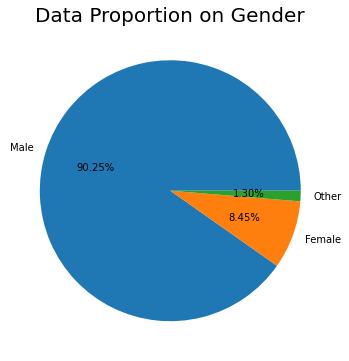

In [18]:
plt.figure(figsize=(10,6))
plt.pie(x='enrollee_id', labels='gender', data=gender_count, autopct='%.2f%%')
plt.title('Data Proportion on Gender', size=20)
plt.show()

The graph above is a graph of proportional data regarding the number of training participants by gender. It can be seen that the participants were dominated by male gender by 90.25%.

In the gender column, no imputer is performed on the missing value, because the gender will not be included in the machine learning process. This is because the proportion of male data are dominating the other two categories. When gender are included in the machine learning process, it is possible that the selected candidates will only be from the male category. So there will be no chance for female entry to be accepted if applying to the company.

## Enrolled Univeristy

The Enrolled University column shows whether the entry is taking a course at a university or not and also indicates whether the course is Full time or Part time. Consists of three unique values, namely, 'no_enrollment' for those who are not taking a course, 'Full time course' for entries who are taking a full time course, and 'Part time course' for entries who are taking part time courses at university.

In [19]:
enroll_count = df.groupby('enrolled_university')['enrollee_id'].count().sort_values(ascending=False).reset_index()
enroll_count

,enrolled_university,enrollee_id
0,no_enrollment,13817
1,Full time course,3757
2,Part time course,1198


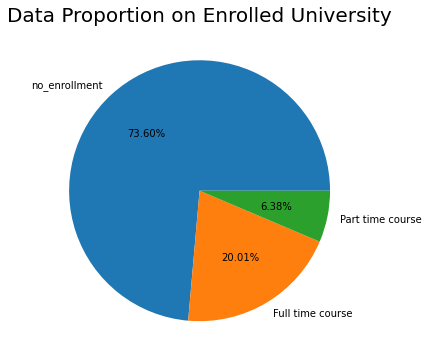

In [20]:
plt.figure(figsize=(10,6))
plt.pie(x='enrollee_id', labels='enrolled_university', data=enroll_count, autopct='%.2f%%')
plt.title('Data Proportion on Enrolled University', size=20)
plt.show()

The graph above is a graph that shows the data on the proportion of participants who sign up for training based on Enrolled University. It can be seen that the participants who took part in the training were mostly participants who were not taking courses at the university.

Next, we check the missing values in the Enrolled University column.

In [21]:
print(f"'enrolled_university' column has {df['enrolled_university'].nunique()} unique values\n{df['enrolled_university'].dropna().unique()} \nwith {df['enrolled_university'].isnull().sum()} missing values")


'enrolled_university' column has 3 unique values
['no_enrollment' 'Full time course' 'Part time course'] 
with 386 missing values


Based on the graph above, inputing missing value for column Enrolled University will be carried out at the preprocessing stage by simple imputer. The imputer itself inputs missing value by entering the most frequently occurring value or mode. In addition, the data in the Enrolled University column is of categorical type, so it is suitable for entering missing values by mode.

## Education Level

The Education Level column shows the last level of education that the entry has completed. This level of education consists of 5 categories, namely Primary School, High School, Graduate, Masters, and Phd.

In [22]:
edu_count  = df.groupby('education_level')['enrollee_id'].count().sort_values(ascending=False).reset_index()
edu_count

,education_level,enrollee_id
0,Graduate,11598
1,Masters,4361
2,High School,2017
3,Phd,414
4,Primary School,308


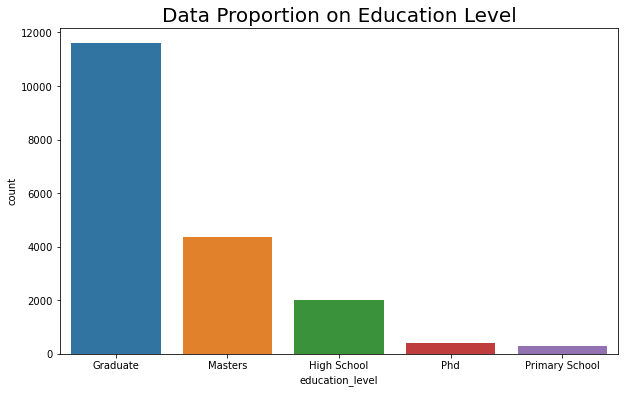

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(df['education_level'])
plt.title('Data Proportion on Education Level', size=20)
plt.show()

The graph above is a graph of the proportion of training participant data based on Education Level. In the graph, the dominating training participants are those who come from the Graduate level.

Furthermore, we can check the missing value at the education level. There are 460 missing values in the column.

In [24]:
print('Total missing value in Education Level:', df['education_level'].isnull().sum())

Total missing value in Education Level: 460


Based on the graph above and the categorical data types, the imputer that will be used is a simple imputer using the most frequent data method or entering the mode value to fill in the missing value. Thus, the trend of the data will not change when the missing value is added to the 'Graduate' category.

## Major Discipline

For the major discipline column, we are dealing with what majors they take when taking a courses at university. We can assume that the entry that enrolled in a university and listed as 'Part time course' or 'Full time course', has a major discipline. Then, for entries that have an education level above 'Graduate', they should have a major discipline.

In [25]:
major_count = df.groupby('major_discipline')['enrollee_id'].count().reset_index()
major_count

,major_discipline,enrollee_id
0,Arts,253
1,Business Degree,327
2,Humanities,669
3,No Major,223
4,Other,381
5,STEM,14492


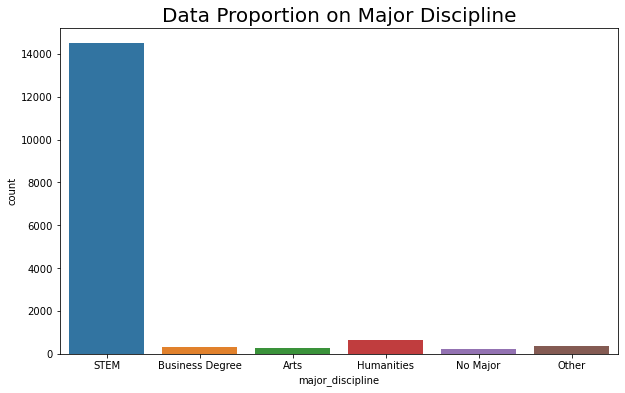

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(df['major_discipline'])
plt.title('Data Proportion on Major Discipline', size=20)
plt.show()

The graph above is a graph of data on the proportion of training participants based on major disciplines. It can be seen that the Department of Science, Technology, Engineering and Mathematics (STEM) dominates the training participants.

Let's count the number of missing values in the major discipline column.

In [27]:
print(f"'major_discipline' column has {df['major_discipline'].isnull().sum()} missing values")


'major_discipline' column has 2813 missing values


The number of missing values in the Major Discipline column is 2813. The missing values in this column will be preprocessed, by entering the major discipline column mode values into the existing missing values.

## Experience

The experience column consists of numerical values where the number shows how many years the entry has worked professionally.

In [28]:
exp_order = ['<1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']

In [29]:
exp_count = df.groupby('experience')['enrollee_id'].count()
exp_count

experience
1       549
10      985
11      664
12      494
13      399
14      586
15      686
16      508
17      342
18      280
19      304
2      1127
20      148
3      1354
4      1403
5      1430
6      1216
7      1028
8       802
9       980
<1      522
>20    3286
Name: enrollee_id, dtype: int64

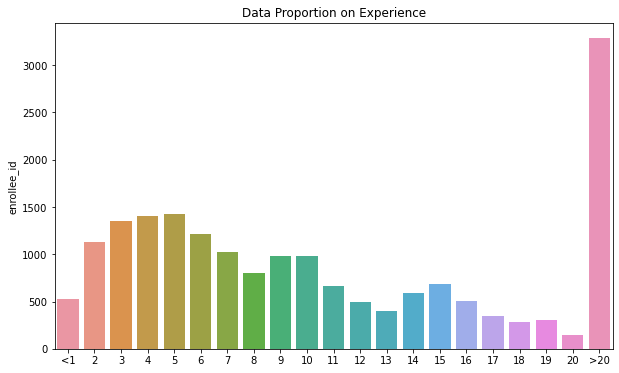

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x=exp_order, y=exp_count.loc[exp_order])
plt.title('Data Proportion on Experience')
plt.show()

The graph above is a graph about the experience of the participants who took part in the training. The graph shows that many participants have more than 20 years of professional work experience.

Because there are values '<1' and '>20', binning is performed on the experience column. The binning divides the experience column into 6 categories or Grade. Here is the distribution of the grades:
* Grade A: >20 years
* Grade B: 16-20 years
* Grade C: 11-15 years
* Grade D: 6-10 years
* Grade E: 1-5 years
* Grade F: <1 year

To simplyfy the replacement of the value,  we changed the data type from object to float. Value '<1' and '> 20' are changed to 0 and 21, so that the entire value of the experience column becomes numerical. Then the data type is changed to float type.

In [31]:
df['experience'] = df['experience'].replace({'>20':21, '<1':0})
df['experience'] = df['experience'].astype(float)

We check whether the value has been changed.

In [32]:
df.groupby('experience')['enrollee_id'].count()

experience
0.0      522
1.0      549
2.0     1127
3.0     1354
4.0     1403
5.0     1430
6.0     1216
7.0     1028
8.0      802
9.0      980
10.0     985
11.0     664
12.0     494
13.0     399
14.0     586
15.0     686
16.0     508
17.0     342
18.0     280
19.0     304
20.0     148
21.0    3286
Name: enrollee_id, dtype: int64

Then, the mapping process is performed to categorize the numerical values into Grades.

In [33]:
df['experience'] = df['experience'].map(lambda x: 'F' if x<1 else\
                                          'E' if 1<=x<=5 else\
                                          'D' if 5<x<=10 else\
                                          'C' if 10<x<=15 else\
                                          'B' if 15<x<=20 else\
                                          'A' if x>20 else\
                                            np.nan)

We check whether the data has been changed to Grade.

In [34]:
exp_count_grade = df.groupby('experience')['enrollee_id'].count()
exp_count_grade

experience
A    3286
B    1582
C    2829
D    5011
E    5863
F     522
Name: enrollee_id, dtype: int64

After that, check the data proportion.

In [35]:
exp_order_grade = ['F','E','D','C','B','A']

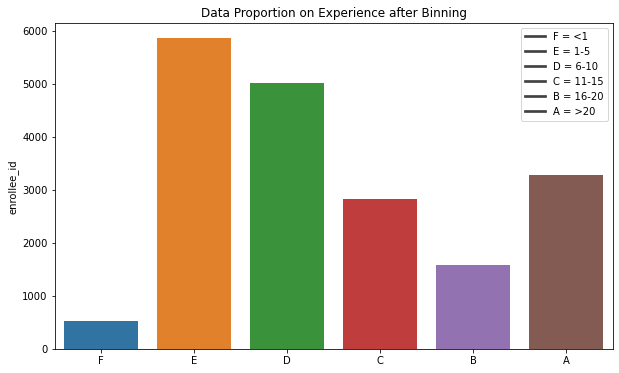

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x=exp_order_grade, y=exp_count_grade.loc[exp_order_grade])
plt.title('Data Proportion on Experience after Binning')
plt.legend(['F = <1','E = 1-5','D = 6-10','C = 11-15','B = 16-20','A = >20'])
plt.show()

Then we check whether there is a missing value in the experience column.

In [37]:
print('Total missing value in Experience column:', df['experience'].isnull().sum())

Total missing value in Experience column: 65


This missing value input will be carried out at the preprocessing stage by filling the missing value with the mode from the experience column.

## Company Size

The Company Size column shows the total number of employees working in the company. Company size is divided into 8 categories, which is '<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', and '10000+'.

In [38]:
df.groupby('company_size')['enrollee_id'].count()

company_size
10/49        1471
100-500      2571
1000-4999    1328
10000+       2019
50-99        3083
500-999       877
5000-9999     563
<10          1308
Name: enrollee_id, dtype: int64

We can see in the table above, there are different formats for the value '10/49'. These values use a backslash(/) to separate values, but for other values use dash(-). Therefore, '10/49' will be formatted according to other values.

In [39]:
df['company_size'] = df['company_size'].replace({'10/49': '10-49'})

In [40]:
df[df['company_size'] == '10-49'].head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
15,6588,city_114,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,B,10-49,Pvt Ltd,>4,18,0.0
35,4866,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,D,10-49,Early Stage Startup,2,206,0.0
41,13854,city_104,0.924,Male,Has relevent experience,no_enrollment,High School,NaN,E,10-49,Pvt Ltd,2,36,0.0
49,25103,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,C,10-49,Pvt Ltd,1,21,0.0
58,13478,city_21,0.624,NaN,Has relevent experience,Full time course,Graduate,STEM,E,10-49,Funded Startup,NaN,32,1.0


Next, we check the proportion of training participants based on company size

In [41]:
size_order =  ['<10','10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']

In [42]:
size_count = df.groupby('company_size')['enrollee_id'].count()
size_count

company_size
10-49        1471
100-500      2571
1000-4999    1328
10000+       2019
50-99        3083
500-999       877
5000-9999     563
<10          1308
Name: enrollee_id, dtype: int64

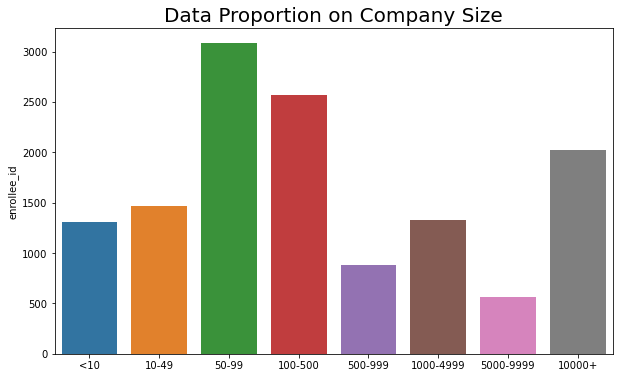

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x=size_order, y=size_count.loc[size_order])
plt.title('Data Proportion on Company Size', size=20)
plt.show()

The graph above is a graph of the proportion of training participant data based on company size. In the graph, it can be seen that most of the training participants came from company size 50-99. While the fewest participants are from company size 5000-9999.

Next, we will see how many missing values are in the Company Size column.

In [44]:
print('Total missing value in company_size:', df['company_size'].isnull().sum())

Total missing value in company_size: 5938


issing value in the company size column will be done via simple imputer.The mode value will replace the missing value in the company size column.

## Company Type

Company type shows types of company that the candidates work. Company type divided into 6 categories:
1. 'Pvt Ltd'
2. 'Funded Startup'
3. 'Early Stage Startup'
4. 'Other'
5. 'Public Sector'
6.'NGO' 

In [45]:
type_order = ['Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other', 'Public Sector', 'NGO']

In [46]:
type_count = df.groupby('company_type')['enrollee_id'].count()
type_count

company_type
Early Stage Startup     603
Funded Startup         1001
NGO                     521
Other                   121
Public Sector           955
Pvt Ltd                9817
Name: enrollee_id, dtype: int64

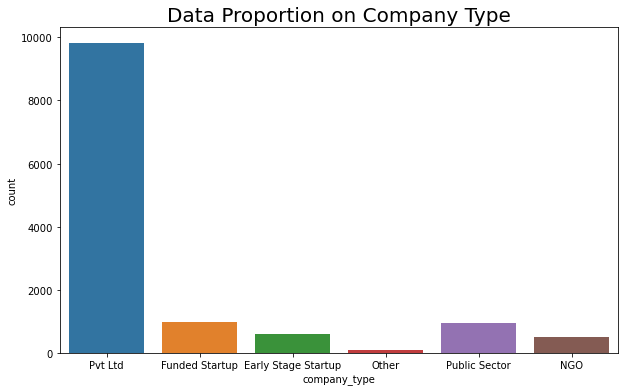

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(df['company_type'])
plt.title('Data Proportion on Company Type', size=20)
plt.show()

The graph above shows the proportion of training participant data by type of company. It can be seen that the Pvt Ltd type companies dominate the number of training participants. While the other types of companies are not so much.

Next, we look at the missing value in the Company Type column

In [48]:
print('Total missing value in Company Type:', df['company_type'].isnull().sum())

Total missing value in Company Type: 6140


The missing value input will be performed in the preprocessing stage. The input uses a simple imputer with the mode or value that appears the most. This is because the type of data is categorical and the difference in the number of Pvt Ltd variable values is far above other variables.

## Last New Job

The Last New Job column shows the difference in years since working at the previous company and the current company. The data consists of 6 categories, which is 'never', '1', '2', '3', '4', and '>4'.

In [49]:
last_job_count = df.groupby('last_new_job')['enrollee_id'].count()
last_job_count

last_new_job
1        8040
2        2900
3        1024
4        1029
>4       3290
never    2452
Name: enrollee_id, dtype: int64

The following graph is the proportion data from the last new job column.

In [50]:
last_job_order = [ 'never', '1', '2', '3', '4', '>4']

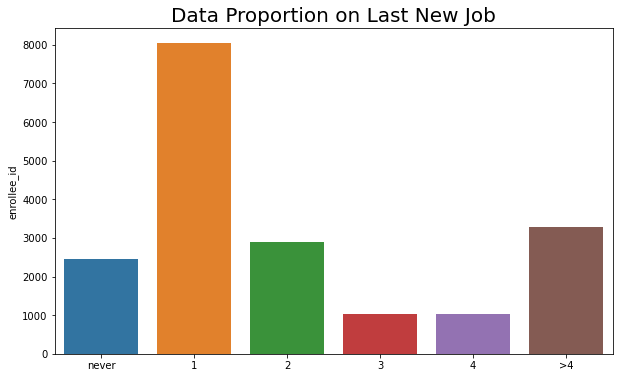

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(x=last_job_order, y=last_job_count.loc[last_job_order])
plt.title('Data Proportion on Last New Job', size=20)
plt.show()

Next, we will change the data type of last new job from object to float. Before that, we will change the two non-numerical values, 'never' and '>4' to 0 and 5.

In [52]:
df['last_new_job'] = df['last_new_job'].replace({'never':0, '1':1, '2':2, '3':3, '4':4,'>4':5})
df['last_new_job'] = df['last_new_job'].astype(float)

In [53]:
df.groupby('last_new_job')['enrollee_id'].count()

last_new_job
0.0    2452
1.0    8040
2.0    2900
3.0    1024
4.0    1029
5.0    3290
Name: enrollee_id, dtype: int64

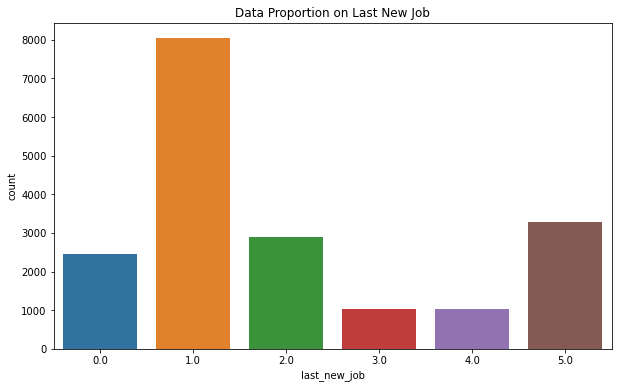

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(df['last_new_job'])
plt.title('Data Proportion on Last New Job')
plt.show()

Next, we see the missing value.

In [55]:
print('Number of missing value in Last New Job:', df['last_new_job'].isnull().sum())

Number of missing value in Last New Job: 423


The input missing value will be performed at the preprocessing stage via simple imputer by replacing the missing value with the mode value. This can be done because the data in the last new job column is categorical data. In addition, by replacing the missing value with the mode value, the trends will not affected too much because there is only an increase in the number of data that appears the most.

## Training Hours

The Training Hours column shows the total time that the entry has participated in the training or course held by the company. This Training Hours is filled with hour format. The average training hours of participants is 65.37 hours. Meanwhile, the highest value was at 336 hours and the lowest was 1 hour.

In [56]:
df['training_hours'].describe()

count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

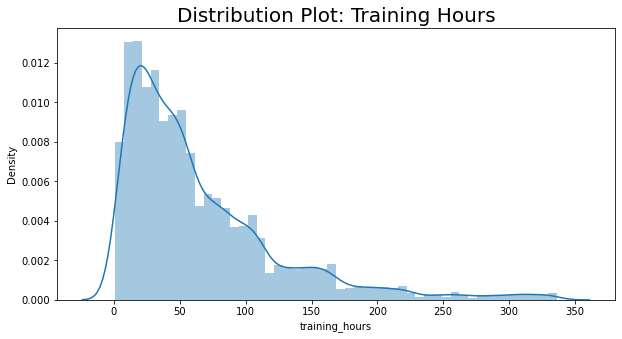

In [57]:
plt.figure(figsize=(10,5))

sns.distplot(df['training_hours'])
plt.title("Distribution Plot: Training Hours", size=20)

plt.show()

The graph above is a distribution plot of the training hours column. In the graph above, it can be seen that the distribution of the training hours column is in the form of right-skewed distribution. If it is right-skewed, it can be concluded that the distribution of the training hours column does not have a normal distribution.

Next, we check the missing value of the columns. Thankfully, the training hours column does not have a missing value.

In [58]:
print('Number of missing values in Training Hours:', df['training_hours'].isnull().sum())

Number of missing values in Training Hours: 0


## Target

Let's see at the target column. This column consist 2 unique varables, 0 and 1. The two variables have meaning that the candidate looking for a job change or not. 0 for 'Not looking for job' and 1 for 'Looking for job'. To simplify things, we can say that 1 is for job seeker and 0 is for non-job seeker.

In [59]:
target_count = df.groupby('target')['enrollee_id'].count().reset_index()
target_count

,target,enrollee_id
0,0.0,14381
1,1.0,4777


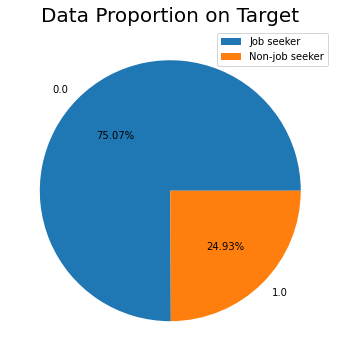

In [60]:
plt.figure(figsize=(10,6))
plt.pie(x='enrollee_id', labels='target', data=target_count, autopct='%.2f%%')
plt.legend(labels=['Job seeker', 'Non-job seeker'], loc=0)
plt.title('Data Proportion on Target', size=20)
plt.show()

Graph above is a pie chart for target data proportion. As we can see the proportion between job seeker and non-job seeker is 1:4. We can say that this is an imbalance data, but to be precised, it's not highly imbalance data.

## Outliers

Outliers are observations or data points whose values are different or far from observations in general. An outlier can indicate a value that is indeed wrong (experimental error) or a value that is caused by certain conditions (variability in the measurement).

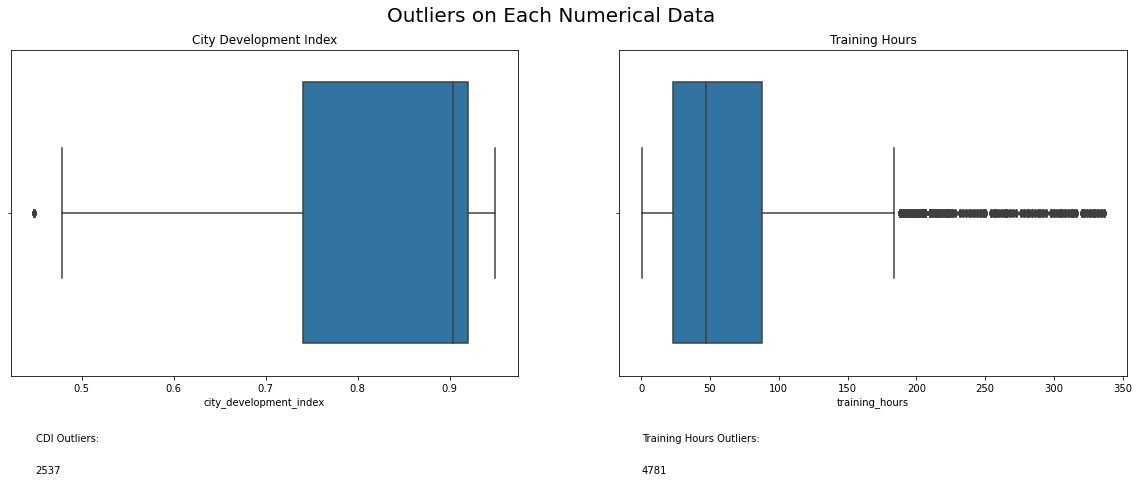

In [61]:
# Outliers Count
cdi_outliers = len(df[df['city_development_index'] > df.describe()['city_development_index']['75%']])
hour_outliers = len(df[df['training_hours'] > df.describe()['training_hours']['75%']])

# Outliers on Boxplot
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.boxplot(df['city_development_index'])
plt.text(0.45, 0.7, 'CDI Outliers:')
plt.text(0.45, 0.8, cdi_outliers)
plt.title("City Development Index")

plt.subplot(1,2,2)
sns.boxplot(df['training_hours'])
plt.text(0.5, 0.7, 'Training Hours Outliers:')
plt.text(0.5, 0.8, hour_outliers)
plt.title("Training Hours")

plt.suptitle('Outliers on Each Numerical Data', size=20)
plt.show()

The graph above shows the outliers from the CDI and the training hours column. From the graph above, it can be seen that both columns have outliers. Outliers on CDI can be seen as dots on the left of the graph or on the left of Q1. Meanwhile, for the training hours column, outliers can be seen in dots on the right of Q3.

Outliers in both columns are collective outliers. It can be defined as a set of data points that are different from other data but are not included as global outliers or contextual outliers. This type of outlier is grouped. If the data viewed individually the data points cannot be called outliers, but if they are a collection of individuals they can be called outliers.

Thus, outliers in both columns will still be included in the data that will be invloved in the machine learning process because if the data is viewed individually, then the data cannot be called outliers.

## Duplicates

Duplicate data is data that has the same records in the data. Duplicate checking is quite important considering that the data entered allows for human error to occur so that the data is inputted more than once. Duplicates that is quite important is enrollee_id. Where's the ID, in this HR analysis data, there should be no duplicates, because the features only represent one entry.

Let's check whether there is duplicate data in the enrolee_id.

In [62]:
len(df[df['enrollee_id'].duplicated()])

0

Then, we check for duplicates for all the data.

In [63]:
len(df[df.duplicated()])

0

In the two tests above, it can be concluded that there is no duplicated data in the data, so no treatment is needed.

# Exploratory Data Analysis II

## Who's looking for a job?

Let's see who's been looking for job from the data. We divided it by gender.

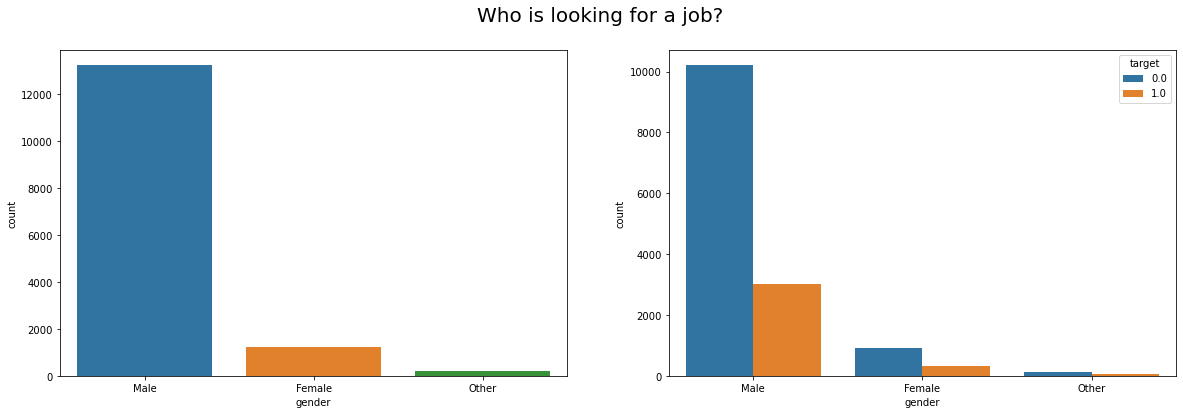

In [64]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x='gender', data=df)

plt.subplot(1,2,2)
sns.countplot(x='gender', hue='target', data=df)

plt.suptitle('Who is looking for a job?', size=20)
plt.show()

Graph above are the proportion of the gender (left) and proportion job seeker by gender (right). We note that most job-seekers are Male. This is not all that surprising as in this dataset Males make up the majority of the sample population.

## Does City Development Index playing a role?

Now, we'll take a look at CDI and Target. Is there any connection between CDI and the target?

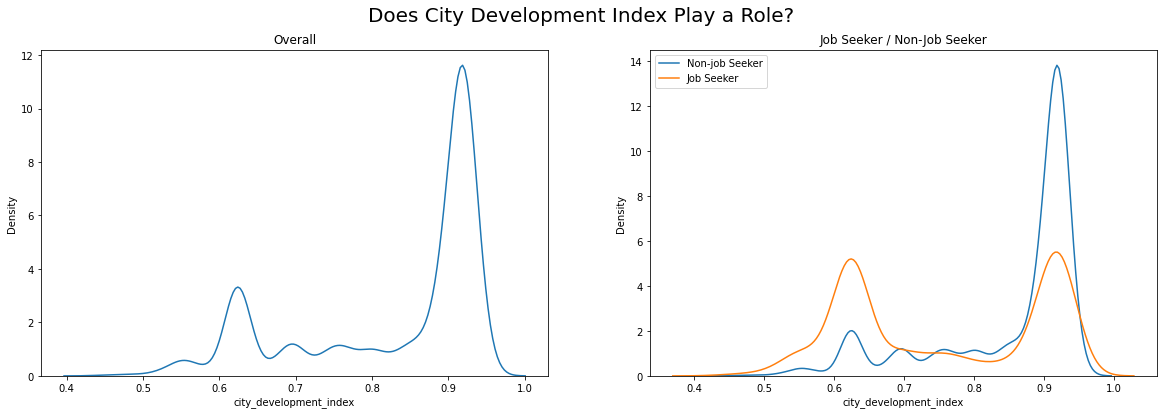

In [65]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.kdeplot(x="city_development_index", data=df)
plt.title('Overall')

plt.subplot(1,2,2)
sns.kdeplot(df.loc[(df["target"]==0), "city_development_index"])
sns.kdeplot(df.loc[(df["target"]==1), "city_development_index"])
plt.legend(labels=['Non-job Seeker', 'Job Seeker'])
plt.title('Job Seeker / Non-Job Seeker')

plt.suptitle('Does City Development Index Play a Role?', size=20)
plt.show()

Graph above is data distribution from CDI (right) and CDI vs target (left). As we can see, the distribution from Non-job seeker are high on higher CDI. But as for job seeker, we see two peak at low CDI and high CDI. We can ponder why this might be; in high CDI areas perhaps there are a lot of opportunities and therefore people feel encouraged to seek better roles. Perhaps in lower CDI areas candidates want to improve their circumstances by searching for new jobs, maybe in new areas.

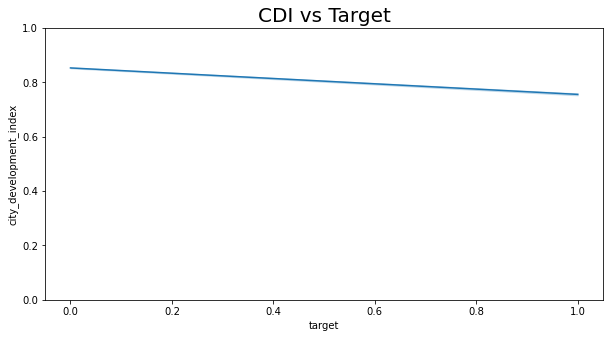

In [66]:
plt.figure(figsize=(10,5))
sns.lineplot(df['target'],df['city_development_index'])
plt.ylim([0,1])
plt.title('CDI vs Target', size=20)
plt.show()

The graph above is a line graph about the relationship between the City Development Index and Job Seeker

The graph above also shows a trend that the smaller the CDI value, the more job seekers there will be. This happens because if the CDI is low, the welfare of the city's residents will also be low. So that people who are in that city may try to improve their welfare by looking for a new job either in their own city or looking for work in another city.

This hypothesis still has to be tested because the available data are insufficient. The data can be supplemented by taking data on factors in calculating CDI such as infrastructure, waste, health, education, and product. So, we can calculate what factors make the city have a low CDI which results in the welfare of its residents. Also, population data is needed which contains data on employment and data on the average salary or minimum wage in the city.

## Company Size & Experience

We will take a look at relation between company size and experience. While we're at it, it's nothing harm if we include job seeker or non-job seeker, isn't it?

### Overall

In [67]:
crosstab = pd.crosstab(df['company_size'],df['experience'], normalize='index').loc[size_order]

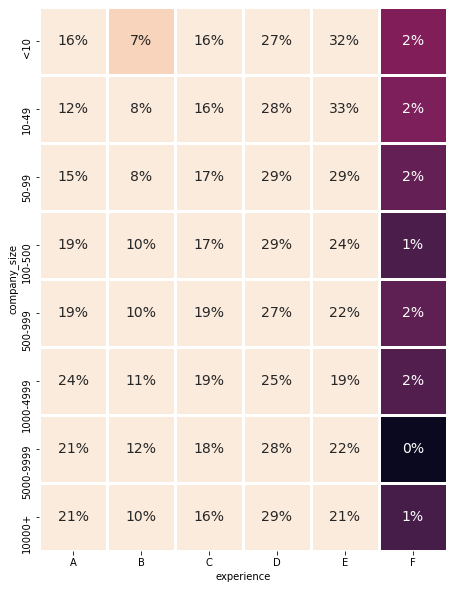

In [68]:
plt.figure(figsize=(20,10))
sns.heatmap(crosstab, linewidths=.1, vmin=0, vmax=0.075, square=True, cbar=False,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})
plt.show()

Graph above is a heatmap about how the experience related to company size. From the heatmat above we can know that those with over 20 yrs experience dominate the work force at all company sizes. We also observe some heat around the lower experience range and at smaller companies. It appears the as employee experience increases, they tend to work for larger companies. Why might this be? Perhaps larger companies pay better, or perhaps more job security.

### Job Seeker

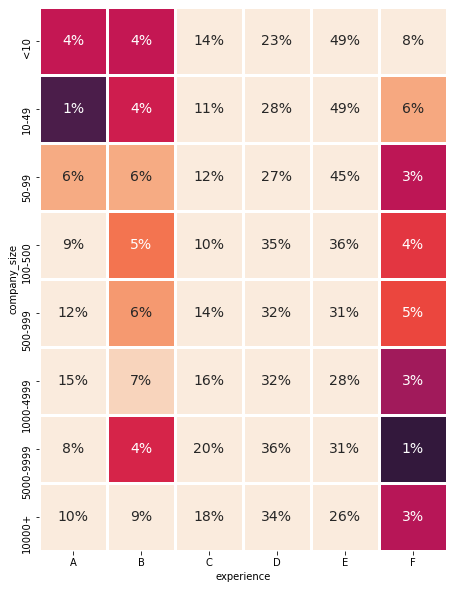

In [69]:
df_target = df[df['target'] == 1]
crosstab_target = pd.crosstab(df_target['company_size'],df_target['experience'], normalize='index').loc[size_order]

plt.figure(figsize=(20,10))
sns.heatmap(crosstab_target, linewidths=.1, vmin=0, vmax=0.075, square=True, cbar=False,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})
plt.show()

Graph above is a heatmap about how the experience related and company size are related to job seeker. We see that most job seekers have between 2 - 6 years experience. Anecdotally this seems correct; people build their skills in the first few years of their career then seek new challenges.

### Non-Job Seeker

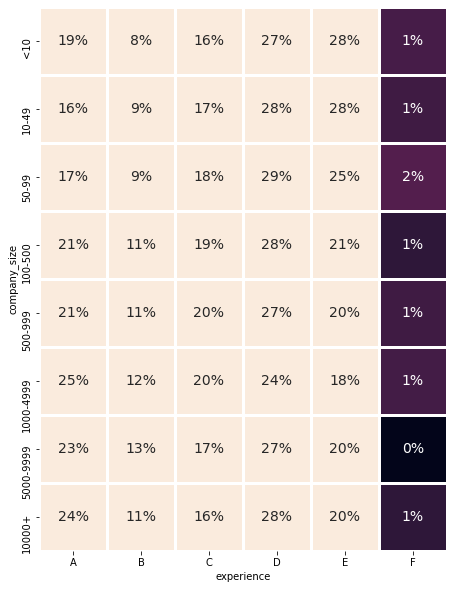

In [70]:
df_non_target = df[df['target'] == 0]
crosstab_non_target = pd.crosstab(df_non_target['company_size'],df_non_target['experience'], normalize='index').loc[size_order]

plt.figure(figsize=(20,10))
sns.heatmap(crosstab_non_target, linewidths=.1, vmin=0, vmax=0.075, square=True, cbar=False,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})
plt.show()

Graph above is a heatmap about how the experience related and company size are related to job seeker. Those with over 20 yrs experience dominate the work force at all company sizes. People with 20+ years of experience are not seeking new roles; perhaps they are at their desired seniority level.

## Relevent Experience vs Education Level

Let's take a look at relevent experience and education level. This can tell us about wether the candidate who sign up for courses have relevent experience based on their education level.

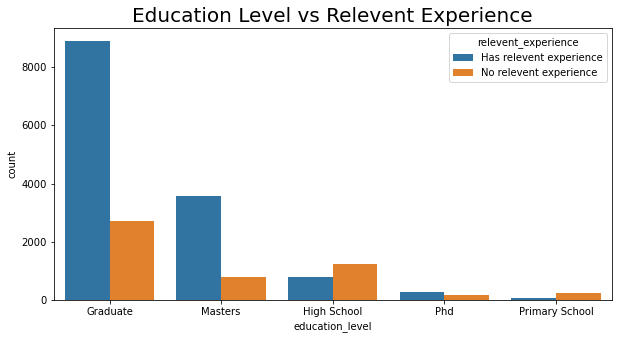

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(x='education_level', hue='relevent_experience', data=df)
plt.title('Education Level vs Relevent Experience', size=20)
plt.show()

From graph above, we can see that in higher education, candidate who have relevant experience are higher than no relevant experience. But in lower education, no relevent experience are higher. We can assume that Data Science job are require more higher education. 

## Relevent Experience vs Experience

Now we'll take a look at experience and relevent experience.

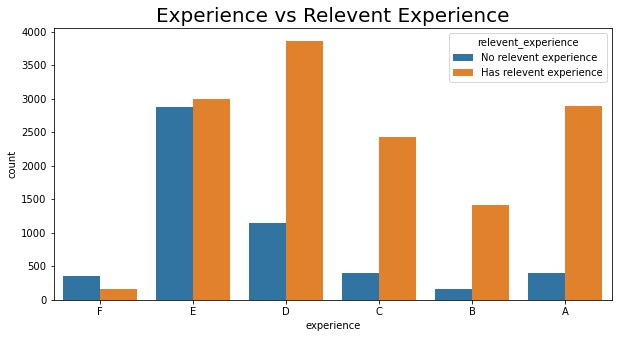

In [72]:
relevent_exp = df[['relevent_experience','experience']].sort_values(by='experience', ascending=False)

plt.figure(figsize=(10,5))
sns.countplot(x='experience', hue='relevent_experience', data=relevent_exp)
plt.title('Experience vs Relevent Experience', size=20)
plt.show()

If we take a look at the graph above, we can conclude that almost all of the experience have relevent experience when sign up for this course. Only experience below one year have no relevent experience topped has relevent experience. It means that maybe in lower experience they want to try something new or a new challange other than the job that they have. It probably make sense because there are some workers who didn't know what they want to do or passionate with, so they tend to try out things before decide to stay at one thing.

## Relevent experience vs Training hours

We still have relevent experience in this section, but we'll compare it with training hours.

In [73]:
relevent_train_hours = df.groupby('relevent_experience')['training_hours'].sum().sort_values(ascending=False).reset_index()
relevent_train_hours

,relevent_experience,training_hours
0,Has relevent experience,907516
1,No relevent experience,344783


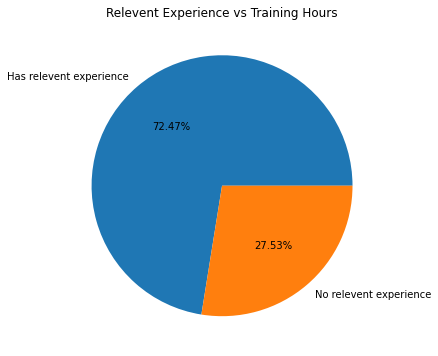

In [74]:
plt.figure(figsize=(10,6))
plt.pie(labels='relevent_experience', x='training_hours', data=relevent_train_hours, autopct='%.2f%%')
plt.title('Relevent Experience vs Training Hours')
plt.show()

From the pie chart above, we can see that 72.5% of training hours are belongs to candidate with relevent experience. Why we comparing relevent experience with training hours? This is because we want to know the intention of the participant. Did they take the course to hone their skills, or learning new skills? From the graph above we can conclude that most of them are honing their skills rather than learning new skills.

## Enrolled university vs training hours

Moving on, let's take a look at enrolled university and training hours. Most of the time, the person who have course in university basically did not have a time to join any courses outside university. So, we'll take a look at how the enrolled university related to training hours.

In [75]:
en_univ_train_hours = df.groupby('enrolled_university')['training_hours'].sum().sort_values(ascending=False).reset_index()
en_univ_train_hours

,enrolled_university,training_hours
0,no_enrollment,903107
1,Full time course,242448
2,Part time course,80951


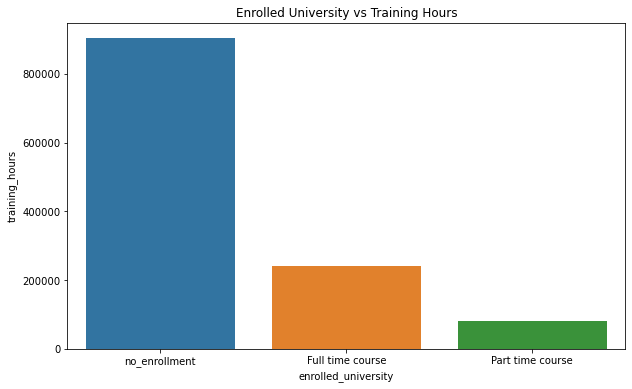

In [76]:
plt.figure(figsize=(10,6))
sns.barplot(x='enrolled_university', y='training_hours', data=en_univ_train_hours)
plt.title('Enrolled University vs Training Hours')
plt.show()

From the graph above, we can see that no enrollment in university are the highest. This make sense since they will have more time to do the course outside university. Meanwhile, the part time course, which most of them have less course than the full time course in the university, is the lowest. This maybe because part time student tends to have a job in the company or somewhere else, so their time are limited to part time course and the job.

## Experience vs last new job

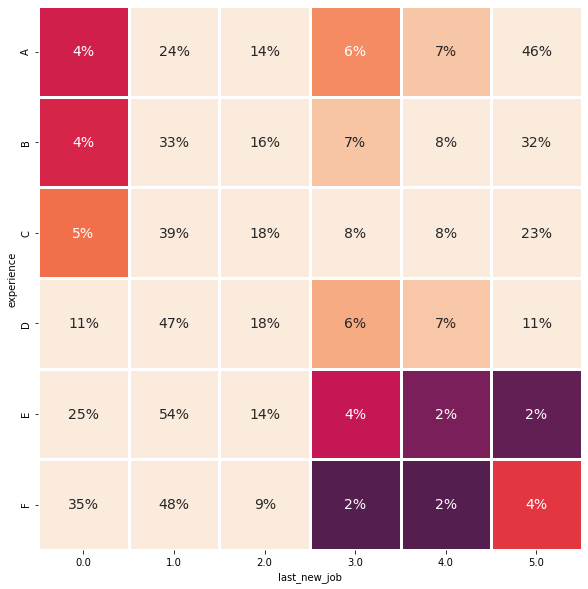

In [77]:
exp_bin_order = ['A', 'B', 'C', 'D', 'E', 'F']
job_exp = pd.crosstab(df['experience'],df['last_new_job'], normalize='index').loc[exp_bin_order]

plt.figure(figsize=(20,10))
sns.heatmap(job_exp, linewidths=.1, vmin=0, vmax=0.075, square=True, cbar=False,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})
plt.show()

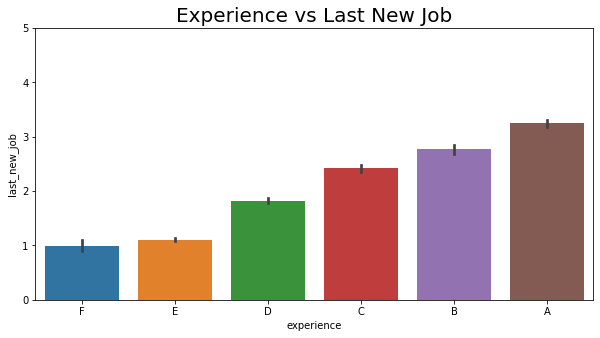

In [88]:
exp_job = df[['experience', 'last_new_job']].sort_values(by='experience', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=exp_job['experience'],y=exp_job['last_new_job'])
plt.ylim([0,5])
plt.title('Experience vs Last New Job', size=20)
plt.show()

The graph above is a graph of the relationship between the last new job and experience.

From the graph above, the trends show loyalty is increased when experience increased, so experience is directly proportional to loyalty to the company.

If analysts are interested in digging deeper into this, then more data is needed. For example, if we are interested in what factors affect a person's loyalty, then we need data such as salary data, company benefits, career paths, and others, in order to determine what factors other than experience affect a person's loyalty.

## Last new job vs target or job seeker

Next, let's take a look at last new job and the job seeker. With this, we can tell the tendency of loyalty with job seeker.

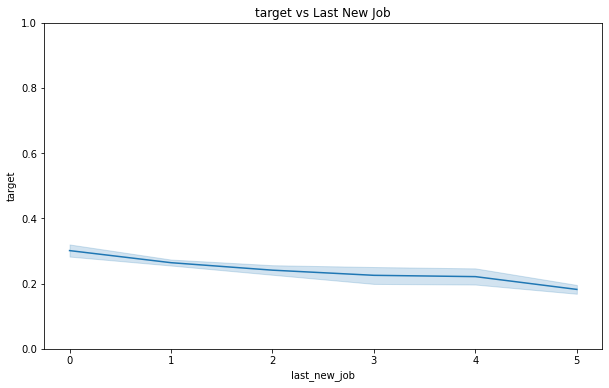

In [82]:
plt.figure(figsize=(10,6))
sns.lineplot(df['last_new_job'],df['target'])
plt.ylim([0,1])
plt.title('target vs Last New Job')
plt.show()

From the graph above we can see that the more loyal to the company, the probability to change the job are lower. This is probably make sense since loyal means stay at the company and not looking for a job elsewhere.

## Experience vs job seeker

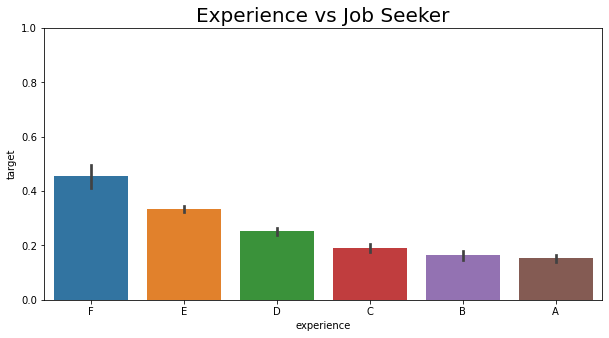

In [87]:
exp_target = df[['experience', 'target']].sort_values(by='experience', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(exp_target['experience'],exp_target['target'])
plt.ylim([0,1])
plt.title('Experience vs Job Seeker', size=20)
plt.show()

From the graph above, the tendecy shows that the more experience the person have, then it less likely to change job.

## Which city are most suitable to held a jobfair?

The ranking of cities that have the potential for a JobFair to be held is through the 'target' feature which shows the entree is looking for work or not, 'relevent_experience' to show whether the entry has experience in the field of Data Science, and training hours to show the entree's ability in the field of Data Science.

The filter is applied to data where only the entry has a target of 1, relevant experience is 'Has relevant Experience' and the number of training hours is above the overall average training hours.

In [ ]:
df_job_seeker_potential = df[(df['target'] == 1) & (df['relevent_experience'] == 'Has relevent experience') & (df['training_hours'] > df['training_hours'].mean())]

In [ ]:
city_top_10 = df_job_seeker_potential.groupby('city')['enrollee_id'].count().sort_values(ascending=False).head(10).reset_index()
city_top_10

,city,enrollee_id
0,city_21,403
1,city_103,204
2,city_160,42
3,city_16,37
4,city_11,34
5,city_114,21
6,city_100,20
7,city_67,18
8,city_73,15
9,city_90,13


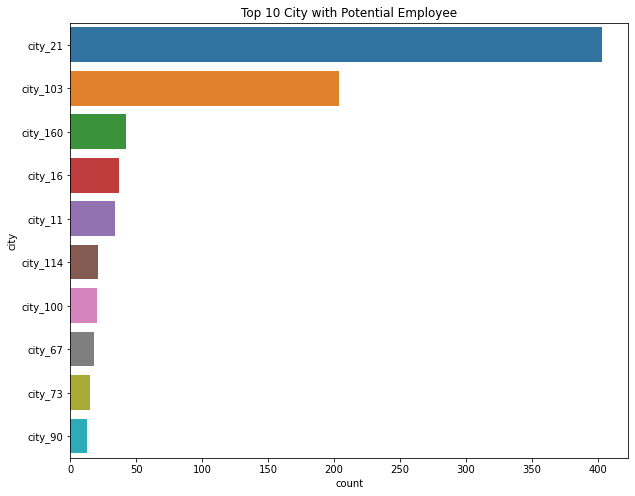

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='enrollee_id', y='city', data=city_top_10)
plt.xlabel('count')
plt.title('Top 10 City with Potential Employee')
plt.show()

The graph above is a graph of 10 cities that have the potential for a JobFair to be held.

As can be seen in the graph above, it shows that a city with code 21 is a city that is suitable for holding a JobFair. With 403 candidates who are looking for work, have experience in the field of Data Science, and have above average training hours, there is a lot of potential to be hired by the company. Thus, the company can save expenses from holding a JobFair that is only in one city.

However, it would be nice if the data contained data regarding the distance between the city where the company is located and the JobFair destination city. This distance can be included in the feature because if the distance is closer, then the expenditure from the JobFair procurement will decrease.

We can now throw experience with the job seeker into a graph. This is for the tendency between two of them wether the job seeker are have more experience or not.

# Preprocessing

## Imputer

As explained earlier, at this stage, the missing value will be inputed by simple imputer, which is replacing the missing value with a predetermined value. In this case, the mode value will replace the missing value in the columns that have missing values.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
columns = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']

simple_impute = SimpleImputer(strategy='most_frequent')
df[columns] = simple_impute.fit_transform(df[columns])
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,A,50-99,Pvt Ltd,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,C,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,E,50-99,Pvt Ltd,0.0,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,F,50-99,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,A,50-99,Funded Startup,4.0,8,0.0


We check the status of missing values from the data after the imputer is done. It can be seen in the table below that there is no missing value in the entire data.

In [ ]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

Then we check again for the proportion data for each column that has a missing value. After checking the proportion of data from the columns that have been carried out with the simple imputer process, it can be seen that there is no change in the trend of the data after imputering with the mode value.

### Gender

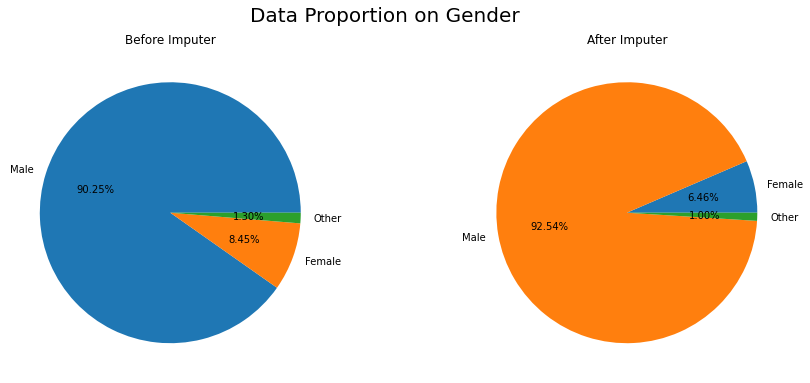

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.pie(x='enrollee_id', labels='gender', data=gender_count, autopct='%.2f%%')
plt.title('Before Imputer')

plt.subplot(1,2,2)
plt.pie(x='enrollee_id', labels='gender', data=df.groupby('gender')['enrollee_id'].count().reset_index(), autopct='%.2f%%')
plt.title('After Imputer')

plt.suptitle('Data Proportion on Gender', size=20)
plt.show()

### Enrolled University

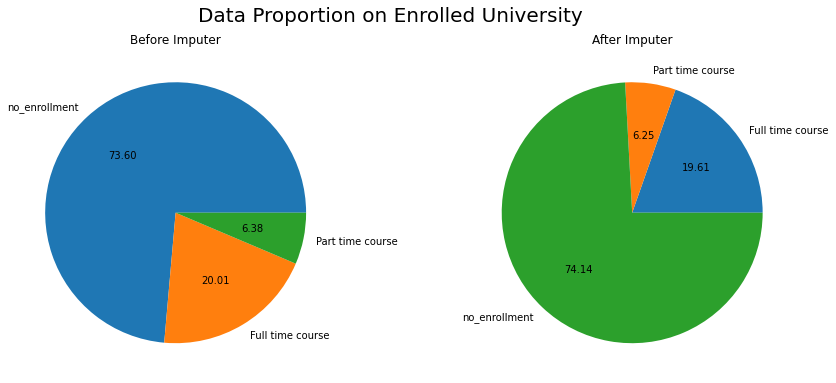

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.pie(x='enrollee_id', labels='enrolled_university', data=enroll_count, autopct='%.2f')
plt.title('Before Imputer')

plt.subplot(1,2,2)
plt.pie(x='enrollee_id', labels='enrolled_university', data=df.groupby('enrolled_university')['enrollee_id'].count().reset_index(), autopct='%.2f')
plt.title('After Imputer')

plt.suptitle('Data Proportion on Enrolled University', size=20)
plt.show()

### Education Level

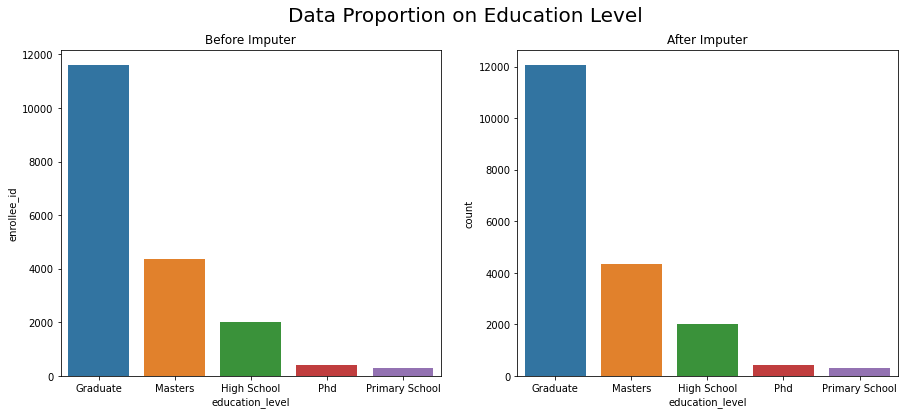

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x='education_level', y='enrollee_id', data=edu_count)
plt.title('Before Imputer')

plt.subplot(1,2,2)
sns.countplot(df['education_level'])
plt.title('After Imputer')

plt.suptitle('Data Proportion on Education Level', size=20)
plt.show()

### Major Discipline

In [ ]:
major_count

,major_discipline,enrollee_id
0,Arts,253
1,Business Degree,327
2,Humanities,669
3,No Major,223
4,Other,381
5,STEM,14492


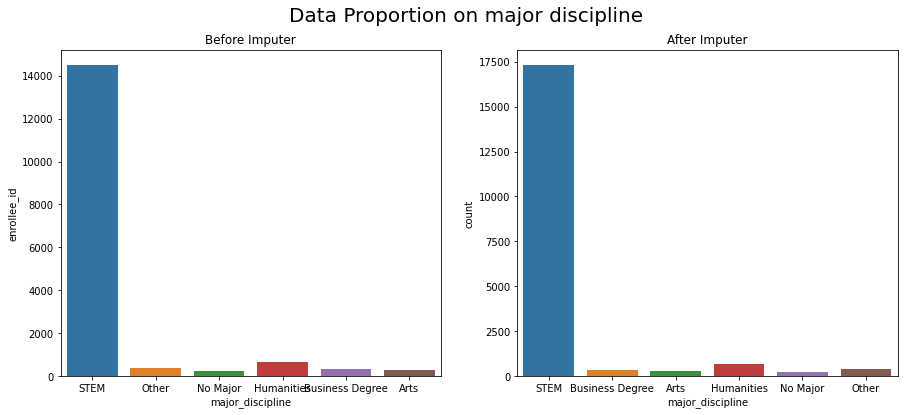

In [ ]:
plt.figure(figsize=(15,6))

x = major_count['major_discipline']
y = major_count['enrollee_id']
order = major_count['major_discipline'].sort_values(ascending=False)
plt.subplot(1,2,1)
sns.barplot(x=x, y=y, order=order)
plt.title('Before Imputer')

plt.subplot(1,2,2)
sns.countplot(df['major_discipline'])
plt.title('After Imputer')

plt.suptitle('Data Proportion on major discipline', size=20)
plt.show()

### Experience

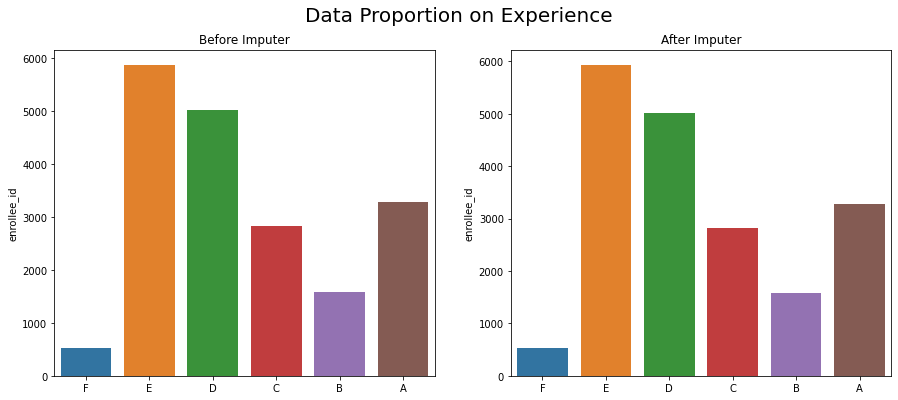

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x=exp_order_grade, y=exp_count_grade.loc[exp_order_grade])
plt.title('Before Imputer')

plt.subplot(1,2,2)
sns.barplot(x=exp_order_grade, y=df.groupby('experience')['enrollee_id'].count().loc[exp_order_grade])
plt.title('After Imputer')

plt.suptitle('Data Proportion on Experience', size=20)
plt.show()

### Company Size

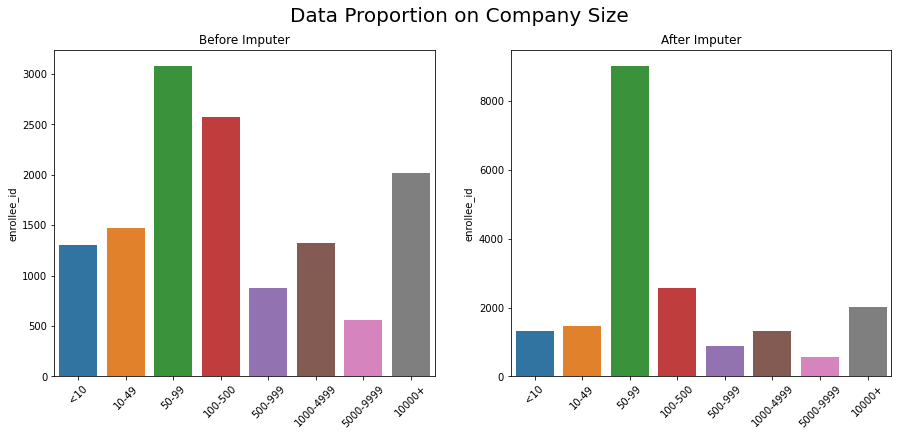

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x=size_order, y=size_count.loc[size_order])
plt.title('Before Imputer')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(x=size_order, y=df.groupby('company_size')['enrollee_id'].count().loc[size_order])
plt.title('After Imputer')
plt.xticks(rotation=45)

plt.suptitle('Data Proportion on Company Size', size=20)
plt.show()

### Company Type

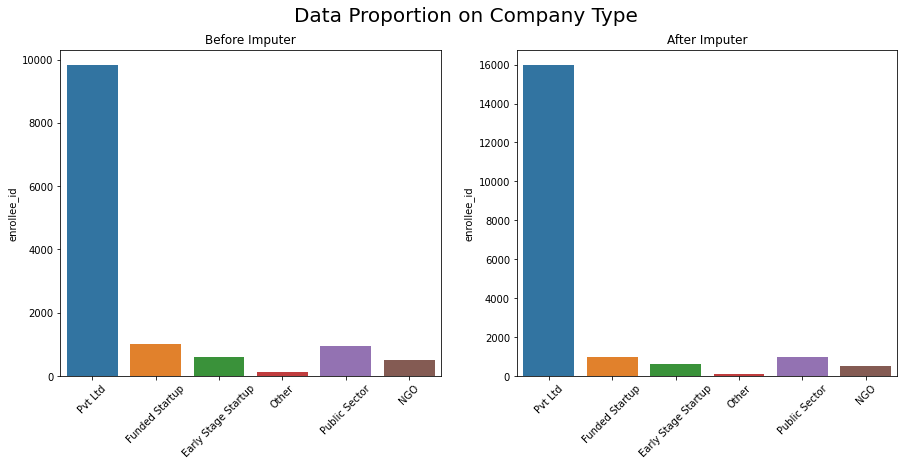

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x=type_order, y=type_count.loc[type_order])
plt.title('Before Imputer')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(x=type_order, y=df.groupby('company_type')['enrollee_id'].count().loc[type_order])
plt.title('After Imputer')
plt.xticks(rotation=45)

plt.suptitle('Data Proportion on Company Type', size=20)
plt.show()

### Last New Job

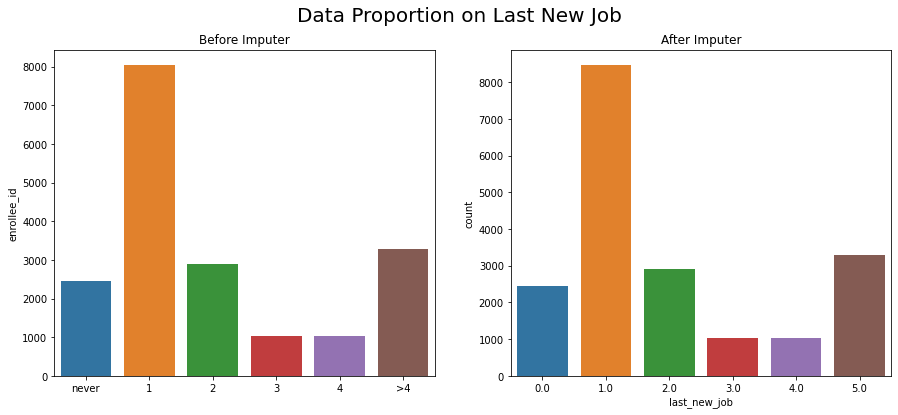

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x=last_job_order, y=last_job_count.loc[last_job_order])
plt.title('Before Imputer')

plt.subplot(1,2,2)
sns.countplot(df['last_new_job'])
plt.title('After Imputer')

plt.suptitle('Data Proportion on Last New Job', size=20)
plt.show()

## Encoding

The next process after the input missing value is to replace the catergorical data into numerical data. This process is called encoding. There are three types of encoding that will be used on the data, which is, One Hot Encoding, Binary Encoding and Ordnial Encoding.

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 3.4 MB/s 


In [ ]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

### One Hot Encoding

In one not encoding we break a categorical variable into several variables whose values are one or zero. This encoding technique is also called dummy variables. In this data, the columns that will be performed one hot endcoding are the relevant_experience and enrolled_university columns. This is because the two columns only have variables less than 5, so the appropriate encoding is one hot encoding.

In [ ]:
onehot_encoding = OneHotEncoder(drop='first')
onehot_var = ['relevent_experience', 'enrolled_university']

### Binary Encoding

Binary encoding can be used as an alternative to one hot encoding. As we discussed earlier, in one hot encoding we create as many dummy variables as there are categories. The drawback is that the more variables used in building the model, the more overfitting the model will be. We use binary encoding so that there are fewer dummy variables. So it's best to use binary encoding for encoding nominal variables that have too many categories.

The fields to be binary encoding are city, major_discipline, company_size, and company_type. The four columns are columns that are included in data that has many unique values, so the appropriate encoding is binary encoding.

In [ ]:
binary_encoding = ce.BinaryEncoder()
binary_var = ['city', 'major_discipline', 'company_size', 'company_type']

### Ordinal Encoding

In ordinal encoding, we transform each category on an ordinal variable into an integer value and also according to its order. In this case, the variables changed into numerical value with order so that the data has meaning.

The columns that will use ordinal encoding are education_level and experience. In the education_level column, the variables are in the order of education from lowest, to highest. It certainly means that the higher the education, the higher the value. The same thing also applies to experience which if more experience will be rated higher than less experience.

In [ ]:
ordinal_var = ['education_level', 'experience']
ordinal_mapping = [
    {
        'col':'education_level',
        'mapping':{
            'Primary School':0,
            'High School':1,
            'Graduate':2,
            'Masters':3,
            'Phd':4
        }
    },

    {
        'col':'experience',
        'mapping':{
            'F':0,
            'E':1,
            'D':2,
            'C':3,
            'B':4,
            'A':5
        }
    }
]

ordinal_encoder = ce.OrdinalEncoder(mapping=ordinal_mapping)

### Column Transformer

The next step is to transform the encoded features.

In [ ]:
transformer = ColumnTransformer(
    [
        ('one hot', onehot_encoding, onehot_var),
        ('binary', binary_encoding, binary_var),
        ('ordinal', ordinal_encoder, ordinal_var)
    ],
    remainder='passthrough'
)

### Apply Encoding

Next is to apply the encoding to the data.

In [ ]:
df_prep = pd.DataFrame(transformer.fit_transform(df))

In [ ]:
onehot_features = list(transformer.transformers_[0][1].get_feature_names())
binary_features = list(transformer.transformers_[1][1].get_feature_names())
ordinal_features = list(transformer.transformers_[2][1].get_feature_names())
features = onehot_features + binary_features + ordinal_features + ['enrollee_id', 'city_development_index', 'gender', 'last_new_job', 'training_hours', 'target']

In [ ]:
df_prep.columns = features

In [ ]:
df_prep.head()

,x0_No relevent experience,x1_Part time course,x1_no_enrollment,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,major_discipline_0,major_discipline_1,major_discipline_2,major_discipline_3,company_size_0,company_size_1,company_size_2,company_size_3,company_type_0,company_type_1,company_type_2,company_type_3,education_level,experience,enrollee_id,city_development_index,gender,last_new_job,training_hours,target
0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,2,5,8949,0.92,Male,1,36,1
1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,2,3,29725,0.776,Male,5,47,0
2,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,2,1,11561,0.624,Male,0,83,0
3,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,2,0,33241,0.789,Male,0,52,1
4,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,3,5,666,0.767,Male,4,8,0


The table above is a data table after encoding process.

# Export

Dataframes are exported for further process

In [ ]:
df_prep.to_csv('datasets/df_preprocess.csv', index=False)